# Global Air Pollution Levels Analysis.

This notebook analyzes air pollution levels data from the [World Air Quality Index by City and Coordinates](https://www.kaggle.com/datasets/adityaramachandran27/world-air-quality-index-by-city-and-coordinates) dataset, which contains air quality statistics for various cities.

The goal is to explore insights about the air quality in different cities and the average air pollution by country.

The dataset includes columns: `Country`, `City`, `AQI Value`, `AQI Category`, `CO AQI Value`, `CO AQI Category`, `Ozone AQI Value`, `Ozone AQI Category`, `NO2 AQI Value`, `NO2 AQI Category`, `PM2.5 AQI Value`, `PM2.5 AQI Category`, `lat`, and `lng`.

## Import the Required Modules

In [ ]:
!pip install contextily --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point

## Loading the Dataset

Here, we load the dataset and inspect its structure to understand the available data.

In [ ]:
# Load the dataset
file_path = "AQI and Lat Long of Countries.csv"
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


## Data Cleaning

We check for missing values, handle inconsistencies, and ensure the dataset is in a usable format.

In [ ]:
print(f"Shape: {df.shape}\nColumn names: {df.columns}")

Shape: (16695, 14)
Column names: Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')


Based on the outcome abouve, the dataset consists of 14 columns and 16695 rows.

In [ ]:
# Check whether the columns contain NaN values
df.isna().sum()

,0
Country,302
City,0
AQI Value,0
AQI Category,0
CO AQI Value,0
CO AQI Category,0
Ozone AQI Value,0
Ozone AQI Category,0
NO2 AQI Value,0
NO2 AQI Category,0


In [ ]:
# Remove the rows that contain NaN values
df.dropna(inplace=True)
# Confirm that the cleaning was successful
df.shape

(16393, 14)

## Exploratory Data Analysis (EDA)

We analyze trends in pollution levels across countries, using summary statistics and visualizations.

### Examine the correlation between the different index metrics.

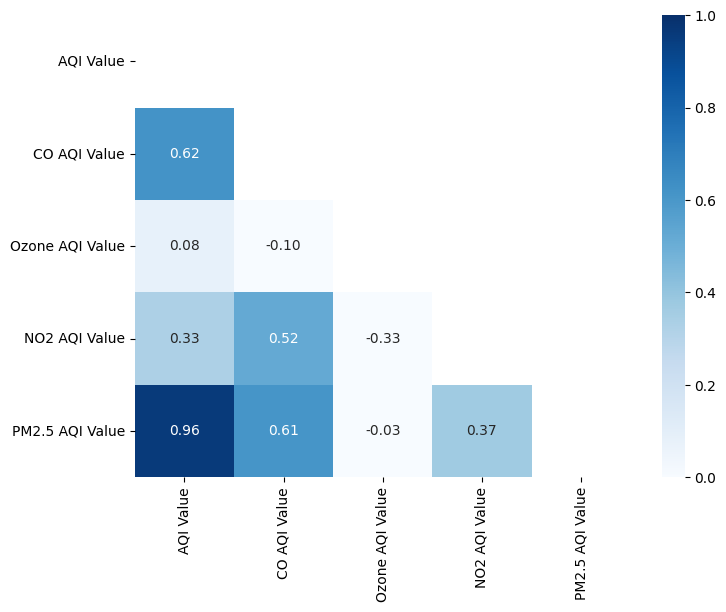

In [ ]:
# Create a correlation matrix for the columns that we are interested in
index_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
corr_matrix = df[index_columns].corr(method='spearman').round(2)

# Create a mask to erase the top-right half of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='Blues', vmin=0, vmax=1, mask=mask, annot=True, fmt='0.2f')
plt.show()

### Examine Air Quality Index (AQI) by City.

#### Distribution of AQI Values.

Plot a histogram with a kernel density estimate (KDE) to examine the distribution of AQI values across all cities.

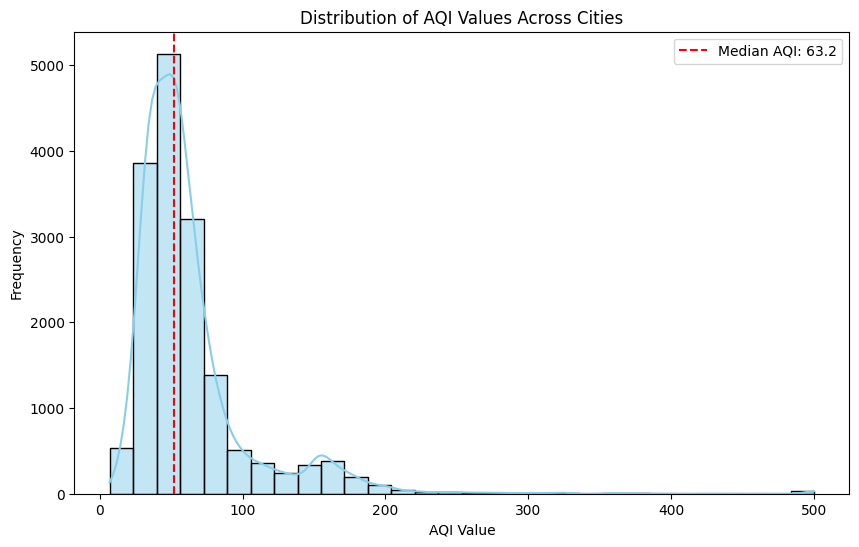

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AQI Value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of AQI Values Across Cities')
plt.xlabel('AQI Value')
plt.ylabel('Frequency')
plt.axvline(df['AQI Value'].median(), color='red', linestyle='--', label=f'Median AQI: {df["AQI Value"].mean():.1f}')
plt.legend()
plt.show()

#### Visualize the different cities AQI, using their coordinates.

Crate a plot with the pollution of each city, using the `geopandas` and the `contextily` modules.

In [ ]:
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df["lng"], df["lat"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # Use WGS84 (lat/lon)

gdf = gdf.to_crs(epsg=3857)
gdf.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng,geometry
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031,POINT (4920666.583 5581371.853)
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900,POINT (-4952604.145 -589718.54)
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869,POINT (-4673960.328 -1265668.408)
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833,POINT (1690197.225 4462368.159)
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833,POINT (2324718.322 6986087.566)


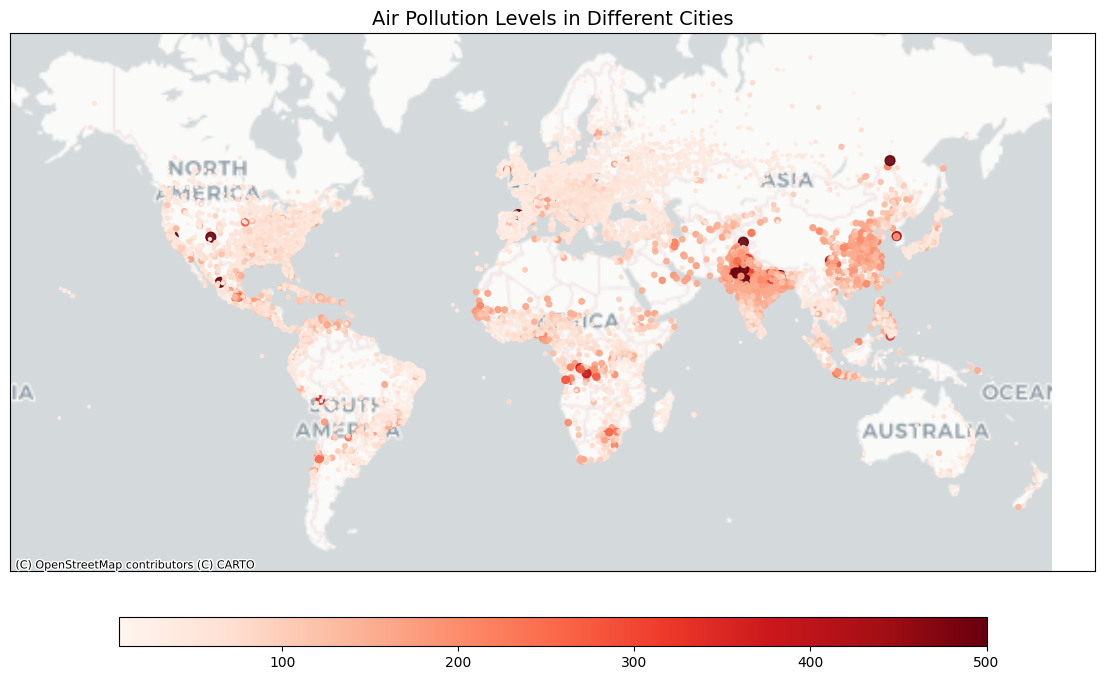

In [ ]:
fig, ax = plt.subplots(figsize=(14, 12))

# Plot cities with pollution level size
gdf.plot(ax=ax, markersize=gdf["AQI Value"] * 0.1, alpha=0.9,
         column="AQI Value", cmap="Reds", legend=True,
         legend_kwds={"orientation": "horizontal",  # Make it horizontal
                      "pad": 0.05,                  # Padding from bottom
                      "aspect": 30,                 # Width-to-height ratio
                      "shrink": 0.8,                # Length of the colorbar
                      "location": "bottom"})       # Position at bottom)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Customize the plot
ax.set_title("Air Pollution Levels in Different Cities", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

plt.show()

#### Cluster the cities by their coordinates, using `sklearn.cluster` module, to create a higher level visualization of pollution.

In [ ]:
from sklearn.cluster import DBSCAN

# Convert lat/lon to NumPy array for clustering
coords = df[['lat', 'lng']].to_numpy()

# Apply DBSCAN clustering (adjust `eps` for how close points should be)
db = DBSCAN(eps=1, min_samples=3).fit(coords)

# Assign cluster labels
df['cluster'] = db.labels_

# Compute average latitude, longitude, and pollution level per cluster
clustered_df = df.groupby('cluster').agg({
    'lat': 'mean',
    'lng': 'mean',
    'AQI Value': 'mean'
}).reset_index()

# Remove noise points (DBSCAN marks noise as -1)
clustered_df = clustered_df[clustered_df['cluster'] != -1]


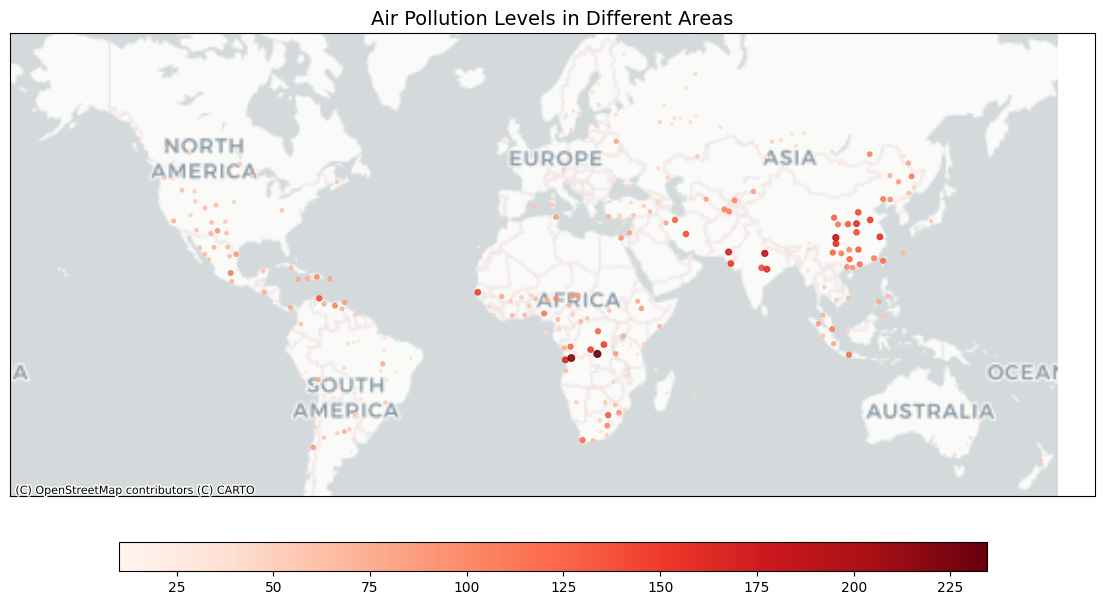

In [ ]:
# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(clustered_df["lng"], clustered_df["lat"])]
gdf = gpd.GeoDataFrame(clustered_df, geometry=geometry, crs="EPSG:4326")  # Use WGS84 (lat/lon)

gdf = gdf.to_crs(epsg=3857)
gdf.head()

fig, ax = plt.subplots(figsize=(14, 12))

# Plot cities with pollution level size
gdf.plot(ax=ax, markersize=clustered_df["AQI Value"] * 0.1, alpha=0.9,
         column="AQI Value", cmap="Reds", legend=True,
         legend_kwds={"orientation": "horizontal",  # Make it horizontal
                      "pad": 0.05,                  # Padding from bottom
                      "aspect": 30,                 # Width-to-height ratio
                      "shrink": 0.8,                # Length of the colorbar
                      "location": "bottom"})       # Position at bottom))

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Customize the plot
ax.set_title("Air Pollution Levels in Different Areas", fontsize=14)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("")
ax.set_ylabel("")

plt.show()

### Examine Air Quality Index (AQI) by Country.

In [ ]:
# Load world country boundaries
world = gpd.read_file("110m_cultural/ne_110m_admin_0_countries.shp")

In [ ]:
df['Country'].unique()

array(['Russian Federation', 'Brazil', 'Italy', 'Poland',
       'United States of America', 'Belgium', 'China', 'Netherlands',
       'France', 'Colombia', 'Romania', 'Indonesia', 'Finland',
       'South Africa',
       'United Kingdom of Great Britain and Northern Ireland', 'India',
       'Haiti', 'Philippines', 'Latvia', 'Germany', 'New Zealand',
       'Mexico', 'Japan', 'El Salvador', 'Nigeria', 'South Sudan',
       'Ireland', 'Turkey', 'Democratic Republic of the Congo', 'Canada',
       'Switzerland', 'Denmark', 'Cameroon', 'Australia', 'Portugal',
       'Ethiopia', 'Hungary', 'Iran (Islamic Republic of)', 'Israel',
       "Côte d'Ivoire", 'Papua New Guinea', 'Madagascar', 'Ghana',
       'Armenia', 'Guatemala', 'Pakistan', 'Thailand', 'Malaysia',
       'Ecuador', 'Argentina', 'Peru', 'Dominican Republic', 'Azerbaijan',
       'Spain', 'Guinea', 'Bolivia (Plurinational State of)', 'Chile',
       'Republic of North Macedonia', 'Kazakhstan', 'Serbia', 'Egypt',
       'Czechi

In [ ]:
world['NAME'].unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

We observe that the names of the counties in the two DataFrames are not consistent. Therefore we will standardize them into the form of the "world" DataFrame, which uses a simpler naming format.

In [ ]:
# Dictionary for standardizing country names
country_mapping = {
    # From df['Country'] to standard
    'Russian Federation': 'Russia',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Democratic Republic of the Congo': 'DR Congo',
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Republic of North Macedonia': 'North Macedonia',
    'United Republic of Tanzania': 'Tanzania',
    'Republic of Moldova': 'Moldova',
    'Kingdom of Eswatini': 'Eswatini',
    'Republic of Korea': 'South Korea',
    'Iran (Islamic Republic of)': 'Iran',
    'Syrian Arab Republic': 'Syria',
    "Lao People's Democratic Republic": 'Laos',
    'Viet Nam': 'Vietnam',
    'Bosnia and Herzegovina': 'Bosnia and Herzegovina',
    'Dominican Republic': 'Dominican Republic',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Central African Republic': 'Central African Republic',
    'South Sudan': 'South Sudan',
    'Equatorial Guinea': 'Equatorial Guinea',
    'Solomon Islands': 'Solomon Islands',
    'State of Palestine': 'Palestine',
}

# Apply to df['Country']
df['Country'] = df['Country'].replace(country_mapping)

#### AQI Categories by Country (Box Plot)

This box plot visualizes the distribution of AQI values within each AQI category for a subset of countries, helping identify variability.

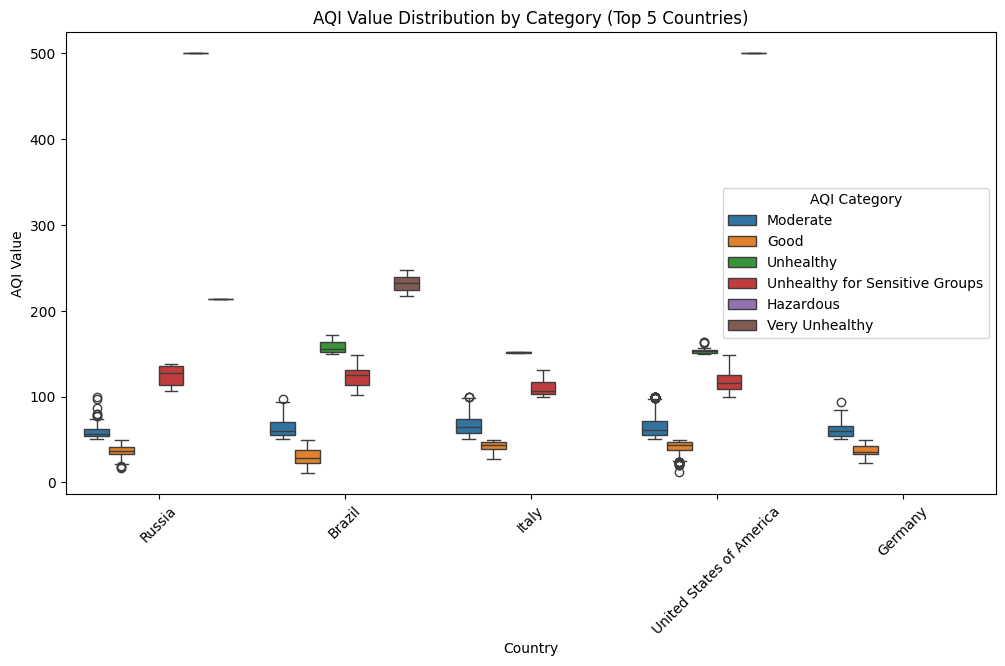

In [ ]:
top_countries = df['Country'].value_counts().head(5).index  # Top 5 countries by data points
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='AQI Value', hue='AQI Category', data=df[df['Country'].isin(top_countries)])
plt.title('AQI Value Distribution by Category (Top 5 Countries)')
plt.xticks(rotation=45)
plt.show()

#### Visualize the Average Air Quality Index (AQI) by Country.

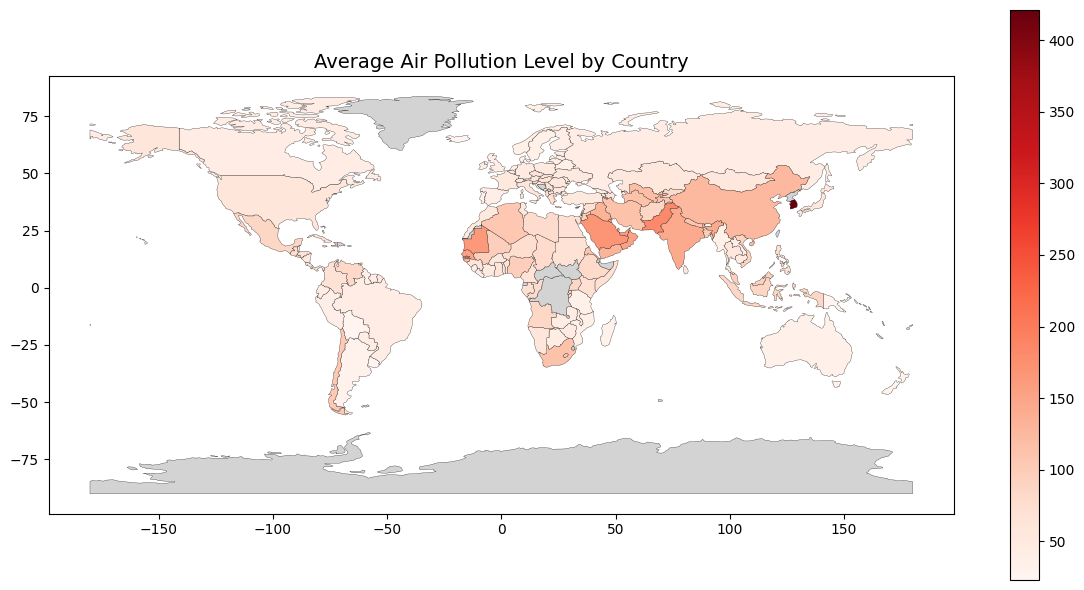

In [ ]:
# Compute the average pollution level per country
country_pollution = df.groupby("Country")["AQI Value"].mean().reset_index()

# Merge pollution data with the world map
world = world.merge(country_pollution, left_on="NAME", right_on="Country", how="left")

fig, ax = plt.subplots(figsize=(12, 6))  # Ensure a single figure with correct size

# Plot the world map colored by pollution level
world.plot(
    column="AQI Value",
    cmap="Reds",
    linewidth=0.2,
    edgecolor="black",
    legend=True,
    ax=ax,  # Ensure it plots on the correct axis
    missing_kwds={"color": "lightgrey", "label": "No data"}
)

# Set title
ax.set_title("Average Air Pollution Level by Country", fontsize=14)

# Fix layout
plt.tight_layout()  # Adjusts spacing to prevent overlapping
plt.show()
